In [27]:
import pandas as pd

# Provide the full path to the f
file_path = r'../Dataset/crowdfunding.xlsx'

# Load the crowdfunding.xlsx file
crowdfunding_df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
crowdfunding_df.head()


,cf_id,contact_id,company_name,blurb,goal,pledged,outcome,backers_count,country,currency,launched_at,deadline,staff_pick,spotlight,category & sub-category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,False,False,food/food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,False,True,music/rock
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,False,False,technology/web
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,False,False,music/rock
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,False,False,theater/plays


In [2]:
# Split the "category & sub-category" column into "category" and "subcategory"
crowdfunding_df[['category', 'subcategory']] = crowdfunding_df['category & sub-category'].str.split('/', expand=True)

# Display the updated DataFrame to confirm the new columns
crowdfunding_df[['category & sub-category', 'category', 'subcategory']].head()


,category & sub-category,category,subcategory
0,food/food trucks,food,food trucks
1,music/rock,music,rock
2,technology/web,technology,web
3,music/rock,music,rock
4,theater/plays,theater,plays


In [3]:
# Get unique categories
unique_categories = crowdfunding_df['category'].unique()

# Create a DataFrame for categories with a "category_id"
category_df = pd.DataFrame({
    'category_id': [f'cat{i+1}' for i in range(len(unique_categories))],  # Generate category IDs
    'category': unique_categories  # Add category names
})

# Display the Category DataFrame
category_df.head()


,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video


In [30]:
# Define the output file path
category_csv_path = r'../Dataset/category.csv'

# Save the DataFrame to a CSV file
category_df.to_csv(category_csv_path, index=False)



In [5]:
# Get unique subcategories
unique_subcategories = crowdfunding_df['subcategory'].unique()

# Create a DataFrame for subcategories with a "subcategory_id"
subcategory_df = pd.DataFrame({
    'subcategory_id': [f'subcat{i+1}' for i in range(len(unique_subcategories))],  # Generate subcategory IDs
    'subcategory': unique_subcategories  # Add subcategory names
})

# Display the Subcategory DataFrame
subcategory_df.head()


,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary


In [31]:
# Define the output file path
subcategory_csv_path = r'../Dataset/subcategory.csv'

# Save the DataFrame to a CSV file
subcategory_df.to_csv(subcategory_csv_path, index=False)



In [7]:
# Merge the crowdfunding DataFrame with category_df to add category_id
campaign_df = pd.merge(
    crowdfunding_df,
    category_df,
    how='left',
    on='category'
)

# Merge the resulting DataFrame with subcategory_df to add subcategory_id
campaign_df = pd.merge(
    campaign_df,
    subcategory_df,
    how='left',
    on='subcategory'
)

# Select and rename relevant columns for the Campaign DataFrame
campaign_df = campaign_df[[
    'cf_id', 'contact_id', 'company_name', 'blurb', 'goal', 
    'pledged', 'outcome', 'backers_count', 'country', 
    'currency', 'launched_at', 'deadline', 
    'category_id', 'subcategory_id'
]].rename(columns={
    'cf_id': 'campaign_id',
    'blurb': 'description',
    'goal': 'goal_amount',
    'pledged': 'pledged_amount',
    'backers_count': 'backer_count',
    'launched_at': 'launch_date',
    'deadline': 'end_date'
})

# Display the Campaign DataFrame
campaign_df.head()


,campaign_id,contact_id,company_name,description,goal_amount,pledged_amount,outcome,backer_count,country,currency,launch_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100,0,failed,0,CA,CAD,1581573600,1614578400,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400,14560,successful,158,US,USD,1611554400,1621918800,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400,142523,successful,1425,AU,AUD,1608184800,1640844000,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200,2477,failed,24,US,USD,1634792400,1642399200,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600,5265,failed,53,US,USD,1608530400,1629694800,cat4,subcat4


In [8]:
# Convert 'launch_date' and 'end_date' to datetime format
campaign_df['launch_date'] = pd.to_datetime(campaign_df['launch_date'], unit='s')
campaign_df['end_date'] = pd.to_datetime(campaign_df['end_date'], unit='s')

# Display the updated DataFrame to confirm the changes
campaign_df[['campaign_id', 'launch_date', 'end_date']].head()


,campaign_id,launch_date,end_date
0,147,2020-02-13 06:00:00,2021-03-01 06:00:00
1,1621,2021-01-25 06:00:00,2021-05-25 05:00:00
2,1812,2020-12-17 06:00:00,2021-12-30 06:00:00
3,2156,2021-10-21 05:00:00,2022-01-17 06:00:00
4,1365,2020-12-21 06:00:00,2021-08-23 05:00:00


In [32]:
# Define the output file path
campaign_csv_path = r'../Dataset/campaign.csv'

# Save the Campaign DataFrame to a CSV file
campaign_df.to_csv(campaign_csv_path, index=False)


In [10]:
# Load the contacts.xlsx file
contacts_file_path = r'../Dataset/contacts.xlsx'
contacts_df = pd.read_excel(contacts_file_path, header=None)  # Remove header=None if headers exist

# Display the first few rows of the raw DataFrame
contacts_df.head()


,0
0,This list of contacts was updated on 11/10/2020.
1,Note: The contact information needs to be sepa...
2,
3,contact_info
4,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco""..."


In [11]:
import pandas as pd

# Load your data from the specified path
contacts_df = pd.read_excel(r'../Dataset/contacts.xlsx', header=None)

# Check the first few rows to ensure the format is correct
print(contacts_df.head())

# Apply the extraction using a more careful approach to ensure we don't miss anything
contacts_df[['contact_id', 'name', 'email']] = contacts_df[0].str.extract(r'{"contact_id": (\d+), "name": "(.*?)", "email": "(.*?)"}')

# Identify rows where extraction failed (missing any of the columns)
invalid_rows = contacts_df[contacts_df[['contact_id', 'name', 'email']].isnull().any(axis=1)]
if not invalid_rows.empty:
    print("Invalid rows:\n", invalid_rows)

# Drop rows where the extraction failed (any column is null)
contacts_df = contacts_df.dropna(subset=['contact_id', 'name', 'email'])

# Split the 'name' column into 'first_name' and 'last_name'
contacts_df[['first_name', 'last_name']] = contacts_df['name'].str.split(' ', n=1, expand=True)

# Drop the original 'name' column
contacts_df.drop(columns=['name'], inplace=True)

# Display the updated DataFrame
contacts_df.head()


                                                   0
0   This list of contacts was updated on 11/10/2020.
1  Note: The contact information needs to be sepa...
2                                                   
3                                       contact_info
4  {"contact_id": 4661, "name": "Cecilia Velasco"...
Invalid rows:
                                                    0 contact_id name email
0   This list of contacts was updated on 11/10/2020.        NaN  NaN   NaN
1  Note: The contact information needs to be sepa...        NaN  NaN   NaN
2                                                           NaN  NaN   NaN
3                                       contact_info        NaN  NaN   NaN


,0,contact_id,email,first_name,last_name
4,"{""contact_id"": 4661, ""name"": ""Cecilia Velasco""...",4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco
5,"{""contact_id"": 3765, ""name"": ""Mariana Ellis"", ...",3765,mariana.ellis@rossi.org,Mariana,Ellis
6,"{""contact_id"": 4187, ""name"": ""Sofie Woods"", ""e...",4187,sofie.woods@riviere.com,Sofie,Woods
7,"{""contact_id"": 4941, ""name"": ""Jeanette Iannott...",4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti
8,"{""contact_id"": 2199, ""name"": ""Samuel Sorgatz"",...",2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz


In [12]:
contacts_df = contacts_df.drop(contacts_df.index[1])


In [13]:
contacts_df.drop(columns=[0], inplace=True)

In [14]:
print(contacts_df.columns)


Index(['contact_id', 'email', 'first_name', 'last_name'], dtype='object')


In [15]:
contacts_df['full_name'] = contacts_df['first_name'] + ' ' + contacts_df['last_name']

# Display the updated DataFrame
contacts_df.head()


,contact_id,email,first_name,last_name,full_name
4,4661,cecilia.velasco@rodrigues.fr,Cecilia,Velasco,Cecilia Velasco
6,4187,sofie.woods@riviere.com,Sofie,Woods,Sofie Woods
7,4941,jeanette.iannotti@yahoo.com,Jeanette,Iannotti,Jeanette Iannotti
8,2199,samuel.sorgatz@gmail.com,Samuel,Sorgatz,Samuel Sorgatz
9,5650,socorro.luna@hotmail.com,Socorro,Luna,Socorro Luna


In [36]:
# Define the output file path for the contacts DataFrame
contacts_csv_path = r'../Dataset/contacts.csv'

# Save the contacts DataFrame to a CSV file
contacts_df.to_csv(contacts_csv_path, index=False)



In [17]:
print("Category DataFrame:")
print(category_df.head(), "\n")

print("Subcategory DataFrame:")
print(subcategory_df.head(), "\n")

print("Campaign DataFrame:")
print(campaign_df.head(), "\n")

print("Contacts DataFrame:")
print(contacts_df.head(), "\n")


Category DataFrame:
  category_id      category
0        cat1          food
1        cat2         music
2        cat3    technology
3        cat4       theater
4        cat5  film & video 

Subcategory DataFrame:
  subcategory_id  subcategory
0        subcat1  food trucks
1        subcat2         rock
2        subcat3          web
3        subcat4        plays
4        subcat5  documentary 

Campaign DataFrame:
   campaign_id  contact_id                 company_name  \
0          147        4661   Baldwin, Riley and Jackson   
1         1621        3765                     Odom Inc   
2         1812        4187   Melton, Robinson and Fritz   
3         2156        4941  Mcdonald, Gonzalez and Ross   
4         1365        2199                Larson-Little   

                                     description  goal_amount  pledged_amount  \
0           Pre-emptive tertiary standardization          100               0   
1               Managed bottom-line architecture         1400       

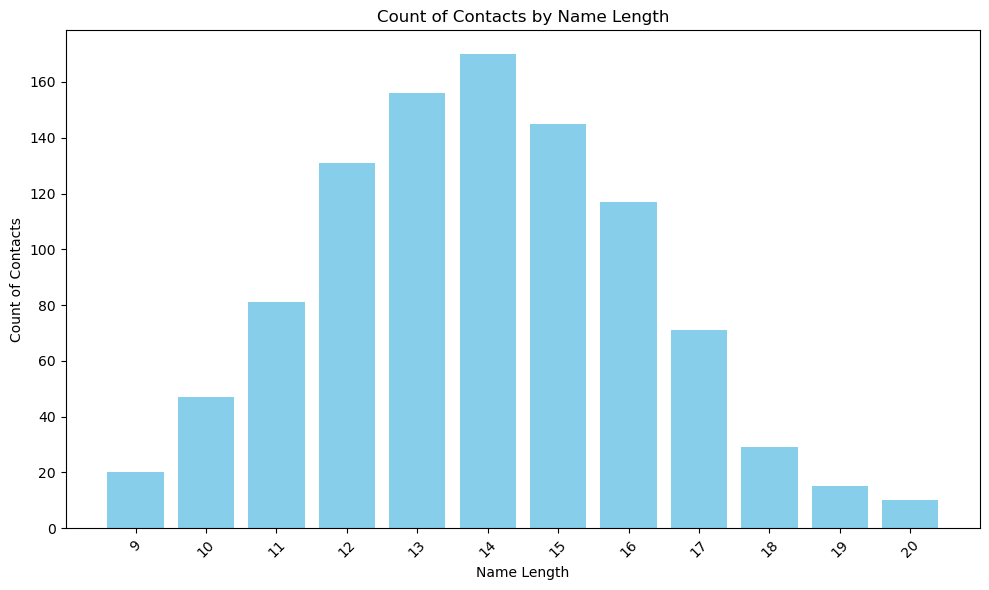

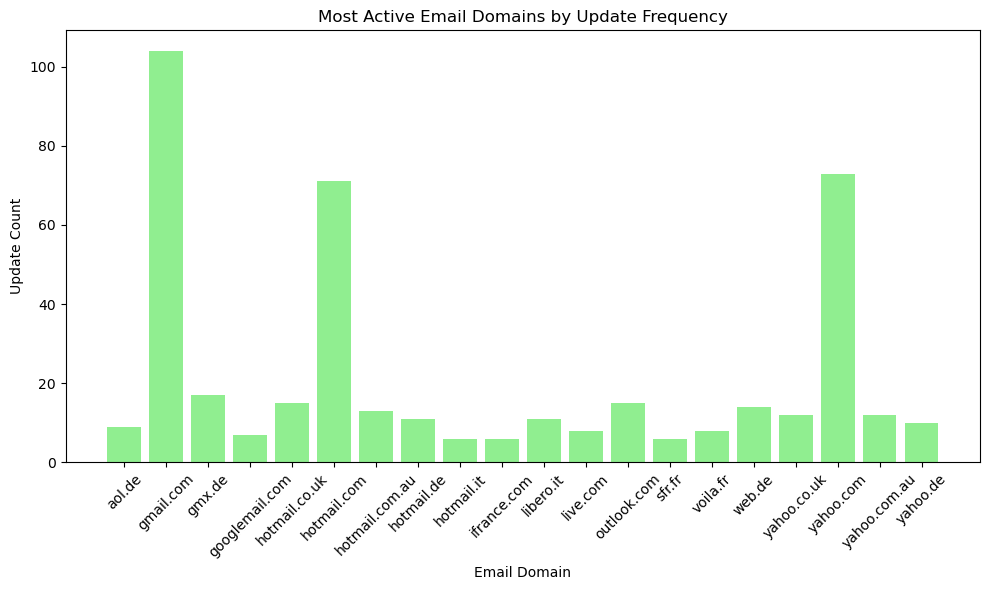

In [20]:
# EDA.ipynb - Replicating transformations from PostgreSQL and visualizations
# This notebook assumes that the 'contacts_df' DataFrame is already loaded in Jupyter.

import pandas as pd
import matplotlib.pyplot as plt

# Assuming contacts_df is already loaded
# contacts_df = pd.read_csv('contacts.csv')  # For example, replace with your actual DataFrame

# Problem 1: Count of Contacts by Name Length
# Calculate the length of full_name for each contact
contacts_df['name_length'] = contacts_df['full_name'].apply(len)

# Group by the length of names and count the number of occurrences
df_name_length = contacts_df.groupby('name_length').size().reset_index(name='name_count')

# Filter for name lengths that appear at least 3 times
df_name_length = df_name_length[df_name_length['name_count'] >= 3]

# Visualize the results for Problem 1: Count of Contacts by Name Length
plt.figure(figsize=(10, 6))
plt.bar(df_name_length['name_length'].astype(str), df_name_length['name_count'], color='skyblue')
plt.title('Count of Contacts by Name Length')
plt.xlabel('Name Length')
plt.ylabel('Count of Contacts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('name_length_distribution.png')
plt.show()

# Problem 5: Most Active Email Domains by Update Frequency
# Extract the email domain from the email column
contacts_df['email_domain'] = contacts_df['email'].str.split('@').str[1]

# Group by email domain and count the occurrences (i.e., how many times each domain appears)
df_email_domain = contacts_df.groupby('email_domain').size().reset_index(name='update_count')

# Filter for domains that appear more than 5 times
df_email_domain = df_email_domain[df_email_domain['update_count'] > 5]

# Visualize the results for Problem 5: Most Active Email Domains by Update Frequency
plt.figure(figsize=(10, 6))
plt.bar(df_email_domain['email_domain'], df_email_domain['update_count'], color='lightgreen')
plt.title('Most Active Email Domains by Update Frequency')
plt.xlabel('Email Domain')
plt.ylabel('Update Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('email_domain_update_frequency.png')
plt.show()
